In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = np.where(iris.target == 0,1,0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test_scaled)

In [9]:
accuracy_score(y_test, y_pred)

1.0

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

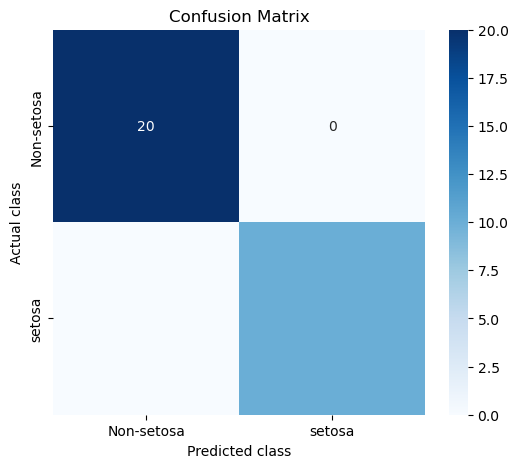

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Non-setosa','setosa'],
           yticklabels=['Non-setosa', 'setosa'])
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.title('Confusion Matrix')
plt.show()